In [9]:
import numpy as np
from sklearn import neighbors,datasets,cross_validation
import matplotlib.pyplot as plt

In [14]:
# 给出一个随机产生的数据集  这里用sin函数，每隔5个点加一个随机的噪音

def creat_data(n):
#     np.random.seed(0)
    X = 5*np.random.rand(n,1)
    Y = np.sin(X).ravel()
    # 随机数个数 每5个 插入一个
    noise_num = int(n/5)
    # 插入噪音随机数，每5个元素一插
    Y[::5] += 1*(0.5 - np.random.rand(noise_num))
    # 返回分组数据 训练集：测试集 = 0.75：0.25
    return cross_validation.train_test_split(X,Y,test_size=0.25,random_state=0)

In [15]:
# 测试分类KNN：
def test_KNeighborsRegressor(*data):
    X_train,X_test,Y_train,Y_test = data
    knr = neighbors.KNeighborsRegressor()
    knr.fit(X_train,Y_train)
    
    print('【训练集成绩】Training Score:{0}'.format(knr.score(X_train,Y_train)))
    print('【测试集成绩】Testing  Score:{0}'.format(knr.score(X_test,Y_test)))

In [16]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(1000)
test_KNeighborsRegressor(X_train,X_test,Y_train,Y_test)

【训练集成绩】Training Score:0.9771752243576858
【测试集成绩】Testing  Score:0.959124464283453


In [17]:
# 检验【K】值与【投票策略】对结果的影响
def test_KNR_k_w(*data):
    X_train,X_test,Y_train,Y_test = data
    Ks = np.linspace(1,Y_train.size,num=50,endpoint=False,dtype='int')
    weights = ['uniform','distance']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for weight in weights :
        train_score = []
        test_score = []
        for K in Ks:
            knr = neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            knr.fit(X_train,Y_train)
            train_score.append(knr.score(X_train,Y_train))
            test_score.append(knr.score(X_test,Y_test))

        ax.plot(Ks,train_score,label='Training Score: weight={0}'.format(weight))
        ax.plot(Ks,test_score, label='Testing Score: weight={0}'.format(weight))
        
    ax.set_xlabel(r'K')
    ax.set_ylabel('score')
    ax.set_title('KNeighborsClassifier')
    ax.legend(loc='best')
    ax.set_ylim(0,1.05)
    plt.show()

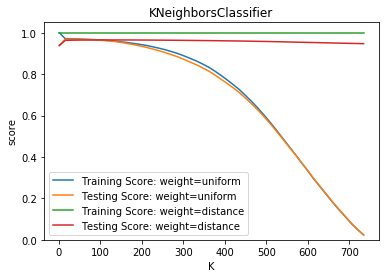

In [19]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(1000)
test_KNR_k_w(X_train,X_test,Y_train,Y_test)

In [20]:
# 检验【P】距离函数对结果的影响
def test_KNR_p(*data):
    X_train,X_test,Y_train,Y_test = data
    Ks = np.linspace(1,Y_train.size,endpoint=False,dtype='int')
    Ps = [1,2,10]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for P in Ps :
        train_score = []
        test_score = []
        for K in Ks:
            knr = neighbors.KNeighborsRegressor(p=P,n_neighbors=K)
            knr.fit(X_train,Y_train)
            train_score.append(knr.score(X_train,Y_train))
            test_score.append(knr.score(X_test,Y_test))

        ax.plot(Ks,train_score,label='Training Score: P={0}'.format(P))
        ax.plot(Ks,test_score, label='Testing Score: P={0}'.format(P))
        
    ax.set_xlabel(r'K')
    ax.set_ylabel('score')
    ax.set_title('KNeighborsClassifier')
    ax.legend(loc='best')
    ax.set_ylim(0,1.05)
    plt.show()

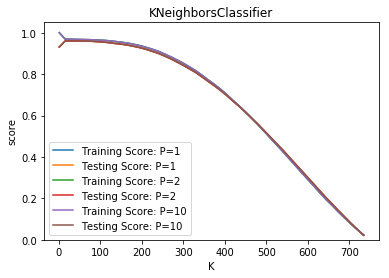

In [21]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(1000)
test_KNR_p(X_train,X_test,Y_train,Y_test)